# Rank Comparation - HC v/s CNN

## Autores: Benjamín Irarrázabal / Joaquín Zepeda

Este notebook reúne los códigos necesarios para calcular las medidas de similitud, el ranking y el ploteo de las imágenes similares a la consultada. \
Este considera las Features ya extraídas por las funciones definidas en otro Notebook (también entregado). Accediendo a ellas usando el directorio donde se ubican. \
Cabe destacar que este código de está corriendo localmente en Jupyter Notebook. \
**Ver Anexo de Informe para Instrucciones detalladas**

# Importamos librerías importantes

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

# Cargamos los datos de ranking de INRIA Holidays database

In [2]:
with open('Rank_HC_pkl' , 'rb') as f:
    Rank_HC = pickle.load(f)

In [3]:
with open('Rank_CNN_pkl' , 'rb') as f:
    Rank_CNN = pickle.load(f)

In [4]:
Rank_HC

,Name,Rank
0,103500,0.181971
1,126100,0.620585
2,118800,0.208544
3,128800,0.929364
4,127600,0.171544
...,...,...
495,149800,0.284561
496,139300,0.513959
497,146800,0.815338
498,148200,0.427178


In [5]:
Rank_CNN

,Name,Rank
0,103500,0.252943
1,126100,0.295156
2,118800,0.106963
3,128800,0.339051
4,127600,0.526236
...,...,...
495,149800,0.277497
496,139300,0.440296
497,146800,0.112008
498,148200,0.427178


## CNN vs HC (INRIA)

In [6]:
def Rank_win(rank_hc, rank_cnn):
    """
    Cálculo de victorias entre ambos métodos de extracción
    
    :param pandas.DataFrame rank_hc: Frame de Ranking para método HandCrafted
    :param pandas.DataFrame rank_cnn: Frame de Ranking para método CNN
    
    :return print de las estadísticas encontradas
    
    """
    # Se definen variables que irán guardando las victorias de cada método
    Histogram_wins = 0
    CNN_wins = 0
    Tie = 0
    # Se itera sobre los frames para analizar y comparar
    for i in range(len(rank_hc)):
        if rank_hc.iloc[i] > rank_cnn.iloc[i]:
            CNN_wins += 1
        elif rank_hc.iloc[i] < rank_cnn.iloc[i]:
            Histogram_wins += 1
        else:
            Tie += 1
    # Se realiza un print de los valores encontrados
    print('Histogram_wins: '+str(Histogram_wins)+', CNN_wins: '+str(CNN_wins)+', Empates: '+str(Tie))
 

In [7]:
Rank_win(Rank_HC['Rank'], Rank_CNN['Rank'])

Histogram_wins: 134, CNN_wins: 325, Empates: 41


Text(0.5, 1.0, 'CNN v/s Histogram Rank, INRIA')

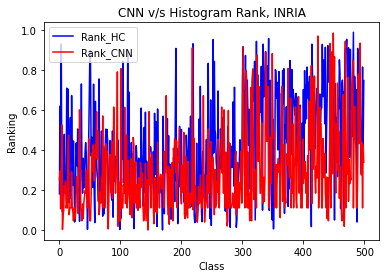

In [22]:
# Sección de código para graficar los rankings dentro de una misma figura para comparar
y1 = Rank_HC['Rank'].tolist() # Handcrafted (HC)
y2 = Rank_CNN['Rank'].tolist() # CNN
x = np.arange(len(y1))
plt.plot(x, y1,'b', label='Rank_HC')
plt.plot(x, y2,'r', label='Rank_CNN')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Ranking')
plt.title('CNN v/s Histogram Rank, INRIA')

# Cargamos los datos de ranking para GPR1200 

In [24]:
with open('RankGPR_HC_pkl' , 'rb') as f:
    RankGPR_HC = pickle.load(f)

In [25]:
RankGPR_HC

,Name,Rank
0,0_430b273cb7915d83,0.420368
1,0_618577ba46bc3d04,0.337343
2,0_8684223b404f7e47,0.314285
3,0_8c54ccf63a12ee74,0.247169
4,0_b904d301c9f168df,0.298655
...,...,...
11995,599_sketch_26,0.899519
11996,599_sketch_29,0.674010
11997,599_sketch_33,0.902094
11998,599_sketch_34,0.566964


In [27]:
with open('RankGPR_CNN_pkl' , 'rb') as f:
    RankGPR_CNN = pickle.load(f)

In [28]:
RankGPR_CNN

,Name,Rank
0,201_170c388e8b1662e78f0e841c7102a0d8,0.518756
1,127_fc1d4cb6e009b51f,0.269365
2,770_049,0.508107
3,1007_nm1111968_rm3407907840_1982-5-28_2010,0.319508
4,638_033,0.447111
...,...,...
11995,887_161786546709_0,0.596707
11996,918_191395475622_9,0.459927
11997,869_141736585292_7,0.485290
11998,957_251733765235_3,0.432795


## CNN vs HC (GPR1200)

In [29]:
Rank_win(RankGPR_HC['Rank'], RankGPR_CNN['Rank'])

Histogram_wins: 5437, CNN_wins: 6562, Empates: 1


Text(0.5, 1.0, 'CNN v/s Histogram Rank, GPR1200')

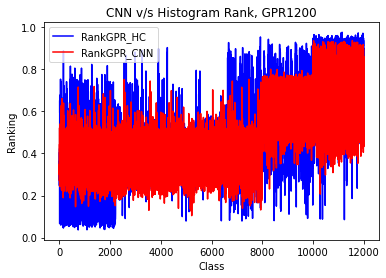

In [30]:
# Sección de código para graficar los rankings dentro de una misma figura para comparar
y1 = RankGPR_HC['Rank'].tolist() # Handcrafted (HC)
y2 = RankGPR_CNN['Rank'].tolist() # CNN
x = np.arange(len(y1))
plt.plot(x, y1,'b', label='RankGPR_HC')
plt.plot(x, y2,'r', label='RankGPR_CNN')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Ranking')
plt.title('CNN v/s Histogram Rank, GPR1200')